<a href="https://colab.research.google.com/github/jneey2000/ML/blob/main/0_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip install tensorflow opencv-python matplotlib

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt


ERROR: Operation cancelled by user


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/MyDrive/Colab Notebooks/CNN"

 0.cnn.ipynb  ' content'


In [ ]:
!ls "/content/drive/MyDrive/Colab Notebooks/CNN/content"


ls: cannot access '/content/drive/MyDrive/Colab Notebooks/CNN/content': No such file or directory


In [ ]:
ls: cannot access '/content/drive/MyDrive/Colab Notebooks/CNN/content': No such file or directory


ls: cannot access ':': No such file or directory
ls: cannot access 'cannot': No such file or directory
ls: cannot access 'access': No such file or directory
ls: cannot access '/content/drive/MyDrive/Colab Notebooks/CNN/content:': No such file or directory
ls: cannot access 'No': No such file or directory
ls: cannot access 'such': No such file or directory
ls: cannot access 'file': No such file or directory
ls: cannot access 'or': No such file or directory
ls: cannot access 'directory': No such file or directory


In [ ]:
!ls "/content/drive/MyDrive/Colab Notebooks/CNN"


 0.cnn.ipynb  ' content'


In [ ]:
data_dir = "/content/drive/MyDrive/Colab Notebooks/CNN/ content"


In [ ]:
!ls "$data_dir"

000000.jpg  000142.jpg	000284.jpg  000426.jpg	000568.jpg  000710.jpg
000001.jpg  000143.jpg	000285.jpg  000427.jpg	000569.jpg  000711.jpg
000002.jpg  000144.jpg	000286.jpg  000428.jpg	000570.jpg  000712.jpg
000003.jpg  000145.jpg	000287.jpg  000429.jpg	000571.jpg  000713.jpg
000004.jpg  000146.jpg	000288.jpg  000430.jpg	000572.jpg  000714.jpg
000005.jpg  000147.jpg	000289.jpg  000431.jpg	000573.jpg  000715.jpg
000006.jpg  000148.jpg	000290.jpg  000432.jpg	000574.jpg  000716.jpg
000007.jpg  000149.jpg	000291.jpg  000433.jpg	000575.jpg  000717.jpg
000008.jpg  000150.jpg	000292.jpg  000434.jpg	000576.jpg  000718.jpg
000009.jpg  000151.jpg	000293.jpg  000435.jpg	000577.jpg  000719.jpg
000010.jpg  000152.jpg	000294.jpg  000436.jpg	000578.jpg  000720.jpg
000011.jpg  000153.jpg	000295.jpg  000437.jpg	000579.jpg  000721.jpg
000012.jpg  000154.jpg	000296.jpg  000438.jpg	000580.jpg  000722.jpg
000013.jpg  000155.jpg	000297.jpg  000439.jpg	000581.jpg  000723.jpg
000014.jpg  000156.jpg	000298.jpg 

In [ ]:
data_dir = "/content/drive/MyDrive/Colab Notebooks/CNN/ content"


이미지 개수: 852
샘플 파일: ['000000.jpg', '000001.jpg', '000002.jpg', '000003.jpg', '000004.jpg']


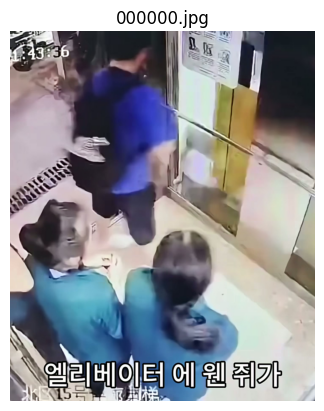

In [ ]:
import os, cv2
import matplotlib.pyplot as plt

# 폴더 내 이미지 확인
images = sorted([f for f in os.listdir(data_dir) if f.endswith(".jpg")])
print("이미지 개수:", len(images))
print("샘플 파일:", images[:5])

# 첫 번째 이미지 표시
img_path = os.path.join(data_dir, images[0])
img = cv2.imread(img_path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title(images[0])
plt.axis('off')
plt.show()


✅ 데이터 로드 완료: 10개 이미지
X shape: (10, 128, 128, 3)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



🧠 성별 분류 모델 구조:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392,707 (28.20 MB)

 Trainable params: 7,392,707 (28.20 MB)

 Non-trainable params: 0 (0.00 B)


🚀 모델 학습 시작...
Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 197ms/step - accuracy: 0.5667 - loss: 0.5465
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 169ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 218ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 218ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 264ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 260ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 307ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 254ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 241ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 168ms/step - accuracy: 1.0000 - loss: 0.0000e+00

✅ 학습 완료!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46108 (\N{HANGUL SYLLABLE DOEN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


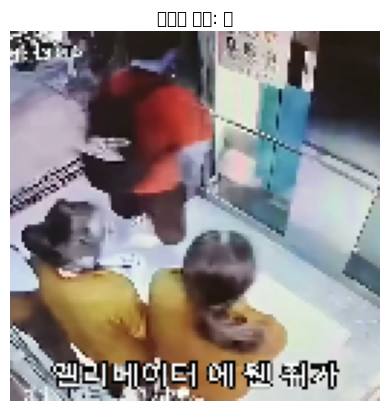

🔍 예측된 성별: 남

💾 모델이 저장되었습니다: /content/drive/MyDrive/Colab Notebooks/CNN/gender_cnn_model.h5


In [ ]:
# ==========================================
# [1] 기본 라이브러리 설정
# ==========================================
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Google Drive 경로 설정 (앞에 공백 주의!)
data_dir = "/content/drive/MyDrive/Colab Notebooks/CNN/ content"

# ==========================================
# [2] 라벨 예시 (테스트용 일부만 지정)
# ==========================================
labels = {
    "000000": {"people": 1, "persons": [{"age": "청년층", "gender": "남"}]},
    "000001": {"people": 1, "persons": [{"age": "청년층", "gender": "남"}]},
    "000002": {"people": 1, "persons": [{"age": "청년층", "gender": "남"}]},
    "000003": {"people": 1, "persons": [{"age": "청년층", "gender": "남"}]},
    "000004": {"people": 1, "persons": [{"age": "청년층", "gender": "남"}]},
    "000005": {"people": 1, "persons": [{"age": "청년층", "gender": "남"}]},
    "000006": {"people": 1, "persons": [{"age": "청년층", "gender": "남"}]},
    "000007": {"people": 1, "persons": [{"age": "청년층", "gender": "남"}]},
    "000008": {"people": 1, "persons": [{"age": "청년층", "gender": "남"}]},
    "000009": {"people": 1, "persons": [{"age": "청년층", "gender": "남"}]},
}

gender_map = {"남": 0, "여": 1, "None": 2}
age_map = {"청년층": 0, "노년층": 1, "None": 2}

# ==========================================
# [3] 이미지 로딩 및 라벨 매칭
# ==========================================
X, y_gender, y_age = [], [], []

for fname, info in labels.items():
    img_path = os.path.join(data_dir, f"{fname}.jpg")
    if not os.path.exists(img_path):
        continue

    img = cv2.imread(img_path)
    img = cv2.resize(img, (128, 128))
    img = img / 255.0
    X.append(img)

    person = info["persons"][0]
    y_gender.append(gender_map[person["gender"]])
    y_age.append(age_map[person["age"]])

X = np.array(X)
y_gender = np.array(y_gender)
y_age = np.array(y_age)

print(f"✅ 데이터 로드 완료: {len(X)}개 이미지")
print("X shape:", X.shape)

# ==========================================
# [4] 데이터 증강 (Data Augmentation)
# ==========================================
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
datagen.fit(X)

# ==========================================
# [5] CNN 모델 정의 (성별 분류용)
# ==========================================
gender_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')  # 남/여/None
])

gender_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print("\n 성별 분류 모델 구조:")
gender_model.summary()

# ==========================================
# [6] 학습 실행
# ==========================================
print("\n모델 학습 시작")
gender_model.fit(datagen.flow(X, y_gender, batch_size=4), epochs=10, verbose=1)
print("\n학습 완료")

# ==========================================
# [7] 테스트 예측
# ==========================================
test_img = X[0].reshape(1,128,128,3)
pred = gender_model.predict(test_img)
pred_label = np.argmax(pred)
rev_gender_map = {0:"남", 1:"여", 2:"None"}

plt.imshow(X[0])
plt.title(f"예측된 성별: {rev_gender_map[pred_label]}")
plt.axis('off')
plt.show()

print("예측된 성별:", rev_gender_map[pred_label])

# ==========================================
# [8] 모델 저장 (Drive에 자동 저장)
# ==========================================
save_path = "/content/drive/MyDrive/Colab Notebooks/CNN/gender_cnn_model.h5"
gender_model.save(save_path)
print(f"\n💾 모델이 저장되었습니다: {save_path}")


데이터 로드 완료: 10개 이미지

 [성별 분류 모델 구조]


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392,707 (28.20 MB)

 Trainable params: 7,392,707 (28.20 MB)

 Non-trainable params: 0 (0.00 B)


 성별 모델 학습 시작...
Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 200ms/step - accuracy: 0.4250 - loss: 0.6887
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 178ms/step - accuracy: 1.0000 - loss: 2.3022e-07
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 209ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 171ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 159ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 166ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 231ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 176ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 168ms/step - accuracy: 1.0000 - loss: 0.0000e+00
성별 모델 학습 완료!

 [연령대 분류 모델 구조]


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392,707 (28.20 MB)

 Trainable params: 7,392,707 (28.20 MB)

 Non-trainable params: 0 (0.00 B)


 연령대 모델 학습 시작...
Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 288ms/step - accuracy: 1.0000 - loss: 0.5099
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 270ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 191ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 177ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 192ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 193ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 181ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 186ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 171ms/step - accuracy: 1.0000 - loss: 0.0000e+00
연령대 모델 학습 완료!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47161 (\N{HANGUL SYLLABLE RYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52397 (\N{HANGUL SYLLABLE CEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **k

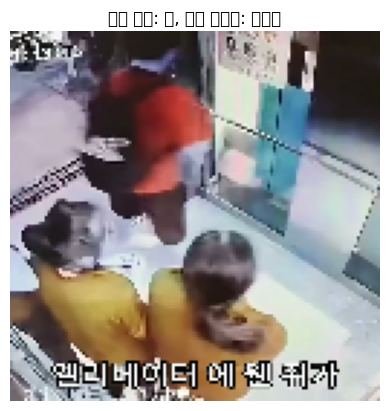

예측 결과 CSV 저장 완료: /content/drive/MyDrive/Colab Notebooks/CNN/prediction_results.csv


모델 저장 완료 (gender_cnn_model.h5, age_cnn_model.h5)


In [ ]:
# ==========================================
# [1] 기본 설정 및 라이브러리 불러오기
# ==========================================
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Drive 이미지 경로 (앞에 공백 포함)
data_dir = "/content/drive/MyDrive/Colab Notebooks/CNN/ content"

# ==========================================
# [2] 라벨 예시
# ==========================================
labels = {
    "000000": {"people": 1, "persons": [{"age": "청년층", "gender": "남"}]},
    "000001": {"people": 1, "persons": [{"age": "청년층", "gender": "남"}]},
    "000002": {"people": 1, "persons": [{"age": "청년층", "gender": "남"}]},
    "000003": {"people": 1, "persons": [{"age": "청년층", "gender": "남"}]},
    "000004": {"people": 1, "persons": [{"age": "청년층", "gender": "남"}]},
    "000005": {"people": 1, "persons": [{"age": "청년층", "gender": "남"}]},
    "000006": {"people": 1, "persons": [{"age": "청년층", "gender": "남"}]},
    "000007": {"people": 1, "persons": [{"age": "청년층", "gender": "남"}]},
    "000008": {"people": 1, "persons": [{"age": "청년층", "gender": "남"}]},
    "000009": {"people": 1, "persons": [{"age": "청년층", "gender": "남"}]},
}

gender_map = {"남": 0, "여": 1, "None": 2}
age_map = {"청년층": 0, "노년층": 1, "None": 2}
rev_gender_map = {0: "남", 1: "여", 2: "None"}
rev_age_map = {0: "청년층", 1: "노년층", 2: "None"}

# ==========================================
# [3] 이미지 로딩
# ==========================================
X, y_gender, y_age, file_names = [], [], [], []

for fname, info in labels.items():
    img_path = os.path.join(data_dir, f"{fname}.jpg")
    if not os.path.exists(img_path):
        continue

    img = cv2.imread(img_path)
    img = cv2.resize(img, (128, 128))
    img = img / 255.0
    X.append(img)
    file_names.append(fname + ".jpg")

    person = info["persons"][0]
    y_gender.append(gender_map[person["gender"]])
    y_age.append(age_map[person["age"]])

X = np.array(X)
y_gender = np.array(y_gender)
y_age = np.array(y_age)
print(f"데이터 로드 완료: {len(X)}개 이미지")

# ==========================================
# [4] 데이터 증강 (Augmentation)
# ==========================================
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
datagen.fit(X)

# ==========================================
# [5] 성별 분류 모델
# ==========================================
gender_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])
gender_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print("\n [성별 분류 모델 구조]")
gender_model.summary()

print("\n 성별 모델 학습 시작...")
gender_model.fit(datagen.flow(X, y_gender, batch_size=4), epochs=10, verbose=1)
print("성별 모델 학습 완료!")

# ==========================================
# [6] 연령대 분류 모델
# ==========================================
age_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])
age_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print("\n [연령대 분류 모델 구조]")
age_model.summary()

print("\n 연령대 모델 학습 시작...")
age_model.fit(datagen.flow(X, y_age, batch_size=4), epochs=10, verbose=1)
print("연령대 모델 학습 완료!")

# ==========================================
# [7] 예측 + 결과 시각화
# ==========================================
gender_preds = np.argmax(gender_model.predict(X), axis=1)
age_preds = np.argmax(age_model.predict(X), axis=1)

plt.imshow(X[0])
plt.title(f"예측 성별: {rev_gender_map[gender_preds[0]]}, 예측 연령대: {rev_age_map[age_preds[0]]}")
plt.axis('off')
plt.show()

# ==========================================
# [8] CSV 결과 저장
# ==========================================
results = pd.DataFrame({
    "filename": file_names,
    "predicted_gender": [rev_gender_map[g] for g in gender_preds],
    "predicted_age": [rev_age_map[a] for a in age_preds]
})
csv_path = "/content/drive/MyDrive/Colab Notebooks/CNN/prediction_results.csv"
results.to_csv(csv_path, index=False, encoding='utf-8-sig')
print(f"예측 결과 CSV 저장 완료: {csv_path}")

# ==========================================
# [9] 모델 저장
# ==========================================
gender_model.save("/content/drive/MyDrive/Colab Notebooks/CNN/gender_cnn_model.h5")
age_model.save("/content/drive/MyDrive/Colab Notebooks/CNN/age_cnn_model.h5")
print("모델 저장 완료 (gender_cnn_model.h5, age_cnn_model.h5)")


In [11]:
import glob, os

IMG_DIR = "/content/drive/MyDrive/Colab Notebooks/CNN/contents"

files = []
for ext in ['*.jpg', '*.jpeg', '*.png', '*.JPG', '*.JPEG', '*.PNG']:
    files.extend(glob.glob(os.path.join(IMG_DIR, ext)))

print("총 이미지 개수:", len(files))
files[:10]


총 이미지 개수: 852


['/content/drive/MyDrive/Colab Notebooks/CNN/contents/000060.jpg',
 '/content/drive/MyDrive/Colab Notebooks/CNN/contents/000171.jpg',
 '/content/drive/MyDrive/Colab Notebooks/CNN/contents/000102.jpg',
 '/content/drive/MyDrive/Colab Notebooks/CNN/contents/000105.jpg',
 '/content/drive/MyDrive/Colab Notebooks/CNN/contents/000101.jpg',
 '/content/drive/MyDrive/Colab Notebooks/CNN/contents/000024.jpg',
 '/content/drive/MyDrive/Colab Notebooks/CNN/contents/000064.jpg',
 '/content/drive/MyDrive/Colab Notebooks/CNN/contents/000135.jpg',
 '/content/drive/MyDrive/Colab Notebooks/CNN/contents/000036.jpg',
 '/content/drive/MyDrive/Colab Notebooks/CNN/contents/000081.jpg']

label file path | 라벨 파일 경로 확정

In [15]:
import os

LABEL_PATH = "/content/drive/MyDrive/Colab Notebooks/CNN/00000to00060.txt"

label_dict = {}

with open(LABEL_PATH, "r", encoding="utf-8") as f:
    for line in f:
        line = line.strip()
        if line == "":
            continue

        parts = line.split("_")
        file_id = parts[0]  # 예: 000060

        # 마지막 2개가 항상 라벨 (연령대, 성별)
        if len(parts) >= 3:
            age_label = parts[-2]
            gender_label = parts[-1]
        else:
            age_label, gender_label = None, None

        label_dict[file_id] = (age_label, gender_label)

print("총 라벨 수:", len(label_dict))
print("샘플 라벨 5개:", list(label_dict.items())[:5])


총 라벨 수: 65
샘플 라벨 5개: [("{'성별','연령대'}", (None, None)), ('성별 : 남, 여, None', (None, None)), ('연령대 : 10대, 20대, 30대, 40대, 50대, 60대이상', (None, None)), ("'파일명'", ('성별', '+a')), ('000000', ('None', '남'))]


# **라벨 파싱 <<완료>> **

In [16]:
import os
import re

LABEL_PATH = "/content/drive/MyDrive/Colab Notebooks/CNN/00000to00060.txt"

label_dict = {}

with open(LABEL_PATH, "r", encoding="utf-8") as f:
    for line in f:
        line = line.strip()
        if line == "":
            continue

        # 숫자로 시작하는 라인만 라벨로 사용
        if not re.match(r'^\d+', line):
            continue

        parts = line.split("_")
        file_id = parts[0]  # 000000, 000001 ...

        if len(parts) >= 3:
            age_label = parts[-2]
            gender_label = parts[-1]
        else:
            age_label, gender_label = None, None

        label_dict[file_id] = (age_label, gender_label)

print("총 라벨 수:", len(label_dict))
print("라벨 샘플 10개:", list(label_dict.items())[:10])


총 라벨 수: 61
라벨 샘플 10개: [('000000', ('None', '남')), ('000001', ('None', '남')), ('000002', ('None', '남')), ('000003', ('None', '남')), ('000004', ('None', '남')), ('000005', ('None', '남')), ('000006', ('None', '남')), ('000007', ('None', '남')), ('000008', ('None', '남')), ('000009', ('None', '남'))]


In [17]:
import cv2
import numpy as np
import os

X = []
y_gender = []
y_age = []
processed_files = [] # 새로 추가: 처리된 파일 경로를 저장할 리스트

for path in files:
    fname = os.path.basename(path).split('.')[0]   # '000060'

    if fname not in label_dict:
        # 해당 번호에 라벨 없는 경우 스킵
        continue

    age_label, gender_label = label_dict[fname]

    # --------------------
    # 성별 라벨 매핑
    # --------------------
    if gender_label == "남":
        gender = 0
    elif gender_label == "여":
        gender = 1
    else:
        gender = -1     # None

    # --------------------
    # 연령대 라벨 매핑
    # --------------------
    if age_label == "10대":
        age = 0
    elif age_label == "20대":
        age = 1
    elif age_label == "30대":
        age = 2
    elif age_label == "40대":
        age = 3
    elif age_label == "50대":
        age = 4
    elif age_label == "60대이상":
        age = 5
    else:
        age = -1        # None

    # --------------------
    # 이미지 로딩 + 전처리
    # --------------------
    img = cv2.imread(path)
    img = cv2.resize(img, (128, 128))
    img = img / 255.0

    X.append(img)
    y_gender.append(gender)
    y_age.append(age)
    processed_files.append(path) # 처리된 파일 경로 추가

X = np.array(X)
y_gender = np.array(y_gender)
y_age = np.array(y_age)

print("총 매칭된 이미지 수:", len(X))
print("성별 라벨 샘플:", y_gender[:20])
print("연령대 라벨 샘플:", y_age[:20])

총 매칭된 이미지 수: 61
성별 라벨 샘플: [ 1  1 -1  1  0 -1  1  1  0  1  0  0  1  0  1 -1  0  1  0  1]
연령대 라벨 샘플: [ 1 -1 -1  1 -1 -1  1  1 -1  1 -1 -1  1 -1 -1 -1 -1  1 -1  1]


In [18]:
# =====================
# 1) 성별 학습 데이터만 추출
# =====================
X_gender = []
y_gender_clean = []

for img, g in zip(X, y_gender):
    if g != -1:    # None 제거
        X_gender.append(img)
        y_gender_clean.append(g)

X_gender = np.array(X_gender)
y_gender_clean = np.array(y_gender_clean)

print("성별 학습용 이미지 수:", len(X_gender))


# =====================
# 2) 연령대 학습 데이터만 추출
# =====================
X_age = []
y_age_clean = []

for img, a in zip(X, y_age):
    if a != -1:   # None 제거
        X_age.append(img)
        y_age_clean.append(a)

X_age = np.array(X_age)
y_age_clean = np.array(y_age_clean)

print("연령대 학습용 이미지 수:", len(X_age))


성별 학습용 이미지 수: 52
연령대 학습용 이미지 수: 29


# **성별 분류 MobileNetV2 모델 (학습용)**

In [19]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model

def build_gender_model():
    base = MobileNetV2(include_top=False, input_shape=(128, 128, 3), weights='imagenet')
    base.trainable = False  # 전이학습 고정

    x = base.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.3)(x)
    output = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=base.input, outputs=output)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

gender_model = build_gender_model()

history_gender = gender_model.fit(
    X_gender, y_gender_clean,
    epochs=20,
    batch_size=8,
    validation_split=0.2
)

gender_model.save("/content/drive/MyDrive/Colab Notebooks/CNN/gender_model.keras")
print("성별 모델 저장 완료")


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 421ms/step - accuracy: 0.5021 - loss: 0.8657 - val_accuracy: 0.7273 - val_loss: 0.3660
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - accuracy: 0.6518 - loss: 0.5383 - val_accuracy: 0.7273 - val_loss: 0.2605
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - accuracy: 0.7444 - loss: 0.4387 - val_accuracy: 1.0000 - val_loss: 0.1584
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - accuracy: 0.8746 - loss: 0.2442 - val_accuracy: 1.0000 - val_loss: 0.1102
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - accuracy: 0.9790 - loss: 0.1195 - val_accuracy: 1.0000 - val_loss: 0.0896
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - accuracy: 1.0000 - loss: 0.1074 - val_accuracy: 1.0000 - val_loss: 0.0742
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 1.0000 - loss: 0.1274 - val_accuracy: 1.0000 - val_loss: 0.0650
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - accuracy: 1.0000 

# 연령대 모델 MobileNetV2 (6클래스)

In [20]:
def build_age_model():
    base = MobileNetV2(include_top=False, input_shape=(128, 128, 3), weights='imagenet')
    base.trainable = False

    x = base.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.3)(x)
    output = Dense(6, activation='softmax')(x)

    model = Model(inputs=base.input, outputs=output)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

age_model = build_age_model()

history_age = age_model.fit(
    X_age, y_age_clean,
    epochs=25,
    batch_size=8,
    validation_split=0.2
)

age_model.save("/content/drive/MyDrive/Colab Notebooks/CNN/age_model_initial.keras")
print("연령대 초기 모델 저장 완료")


Epoch 1/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 923ms/step - accuracy: 0.1773 - loss: 2.0093 - val_accuracy: 1.0000 - val_loss: 0.2530
Epoch 2/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - accuracy: 1.0000 - loss: 0.2058 - val_accuracy: 1.0000 - val_loss: 0.0164
Epoch 3/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step - accuracy: 1.0000 - loss: 0.0322 - val_accuracy: 1.0000 - val_loss: 0.0022
Epoch 4/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 542ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 1.0000 - val_loss: 5.3869e-04
Epoch 5/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 252ms/step - accuracy: 1.0000 - loss: 5.2452e-04 - val_accuracy: 1.0000 - val_loss: 1.9193e-04
Epoch 6/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 156ms/step - accuracy: 1.0000 - loss: 1.4544e-04 - val_accuracy: 1.0000 - val_loss: 8.9383e-05
Epoch 7/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 250ms/step - accuracy: 1.0000 - loss: 1.4949e-04 - val_accuracy: 1.0000 - val_loss: 5.0424e-05
Epoch 8/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 272ms/step - accuracy: 1.0000 - loss: 8.0597e-05 - 

# Semi-Supervised (연령대 None 채우기)

라벨이 None(-1)인 데이터만 모으기

In [21]:
X_unlabeled = []
idx_unlabeled = []

for i, a in enumerate(y_age):
    if a == -1:
        X_unlabeled.append(X[i])
        idx_unlabeled.append(i)

X_unlabeled = np.array(X_unlabeled)
print("None 라벨 이미지 수:", len(X_unlabeled))


None 라벨 이미지 수: 32


초기 연령대 모델로 None을 예측해 라벨 채우기

In [22]:
preds = age_model.predict(X_unlabeled)
pseudo_labels = preds.argmax(axis=1)

print("생성된 pseudo-label 20개:", pseudo_labels[:20])


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
생성된 pseudo-label 20개: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


pseudo-label을 기존 라벨에 병합 (데이터 61개 모두 사용)

In [23]:
y_age_full = y_age.copy()

for idx, pl in zip(idx_unlabeled, pseudo_labels):
    y_age_full[idx] = pl  # None → pseudo label

print("전체 연령대 라벨 분포:", np.bincount(y_age_full))


전체 연령대 라벨 분포: [ 0 61]


# **전체 연령대 재학습 (semi-supervised)**

In [24]:
age_model_finetuned = build_age_model()

history_age2 = age_model_finetuned.fit(
    X, y_age_full,
    epochs=25,
    batch_size=8,
    validation_split=0.2
)

age_model_finetuned.save("/content/drive/MyDrive/Colab Notebooks/CNN/age_model_final.keras")
print("연령대 최종 모델 저장 완료")


Epoch 1/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 650ms/step - accuracy: 0.6131 - loss: 0.9235 - val_accuracy: 1.0000 - val_loss: 0.0080
Epoch 2/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step - accuracy: 1.0000 - loss: 0.0049 - val_accuracy: 1.0000 - val_loss: 3.0103e-04
Epoch 3/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - accuracy: 1.0000 - loss: 4.4429e-04 - val_accuracy: 1.0000 - val_loss: 5.3669e-05
Epoch 4/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - accuracy: 1.0000 - loss: 7.6680e-05 - val_accuracy: 1.0000 - val_loss: 2.0449e-05
Epoch 5/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - accuracy: 1.0000 - loss: 3.9439e-05 - val_accuracy: 1.0000 - val_loss: 1.1802e-05
Epoch 6/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - accuracy: 1.0000 - loss: 2.0400e-05 - val_accuracy: 1.0000 - val_loss: 8.6564e-06
Epoch 7/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - accuracy: 1.0000 - loss: 2.2547e-05 - val_accuracy: 1.0000 - val_loss: 7.1984e-06
Epoch 8/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - accuracy: 1.0000 - los

# 최종 파이프라인(예측 → CSV 저장)

In [27]:
import numpy as np
import pandas as pd
import os

# 1) 전체 이미지 로딩
X_all = []
file_names_all = []

for path in files:
    img = cv2.imread(path)
    img = cv2.resize(img, (128,128))
    img = img / 255.0
    X_all.append(img)
    file_names_all.append(os.path.basename(path))

X_all = np.array(X_all)

print("전체 이미지 수:", len(X_all))

# 2) 전체 예측
pred_gender_all = (gender_model.predict(X_all) > 0.5).astype(int).flatten()
pred_age_all = age_model_finetuned.predict(X_all).argmax(axis=1)

# 3) CSV 생성
df = pd.DataFrame({
    "file": file_names_all,
    "gender": pred_gender_all,
    "age": pred_age_all
})

save_csv = "/content/drive/MyDrive/Colab Notebooks/CNN/final_prediction_full.csv"
df.to_csv(save_csv, index=False)

print("CSV 저장 완료:", save_csv)
df.head()


전체 이미지 수: 852
27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 356ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 294ms/step
CSV 저장 완료: /content/drive/MyDrive/Colab Notebooks/CNN/final_prediction_full.csv


,file,gender,age
0,000060.jpg,1,1
1,000171.jpg,1,1
2,000102.jpg,1,1
3,000105.jpg,1,1
4,000101.jpg,1,1


# 전체 852개 이미지에 대해 예측 → CSV 저장

In [28]:
import numpy as np
import pandas as pd
import os

# 1) 전체 이미지 로딩
X_all = []
file_names_all = []

for path in files:
    img = cv2.imread(path)
    img = cv2.resize(img, (128,128))
    img = img / 255.0
    X_all.append(img)
    file_names_all.append(os.path.basename(path))

X_all = np.array(X_all)

print("전체 이미지 수:", len(X_all))

# 2) 전체 예측
pred_gender_all = (gender_model.predict(X_all) > 0.5).astype(int).flatten()
pred_age_all = age_model_finetuned.predict(X_all).argmax(axis=1)

# 3) CSV 생성
df = pd.DataFrame({
    "file": file_names_all,
    "gender": pred_gender_all,
    "age": pred_age_all
})

save_csv = "/content/drive/MyDrive/Colab Notebooks/CNN/final_prediction_full.csv"
df.to_csv(save_csv, index=False)

print("CSV 저장 완료:", save_csv)
df.head()


전체 이미지 수: 852
27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 331ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 359ms/step
CSV 저장 완료: /content/drive/MyDrive/Colab Notebooks/CNN/final_prediction_full.csv


,file,gender,age
0,000060.jpg,1,1
1,000171.jpg,1,1
2,000102.jpg,1,1
3,000105.jpg,1,1
4,000101.jpg,1,1


# 훈련 그래프 시각화 코드 (연령대, 성별)

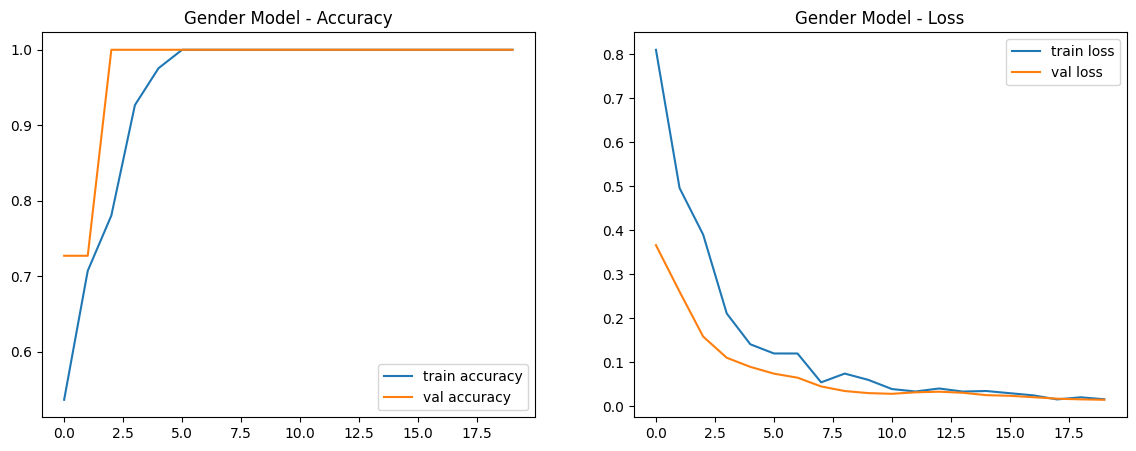

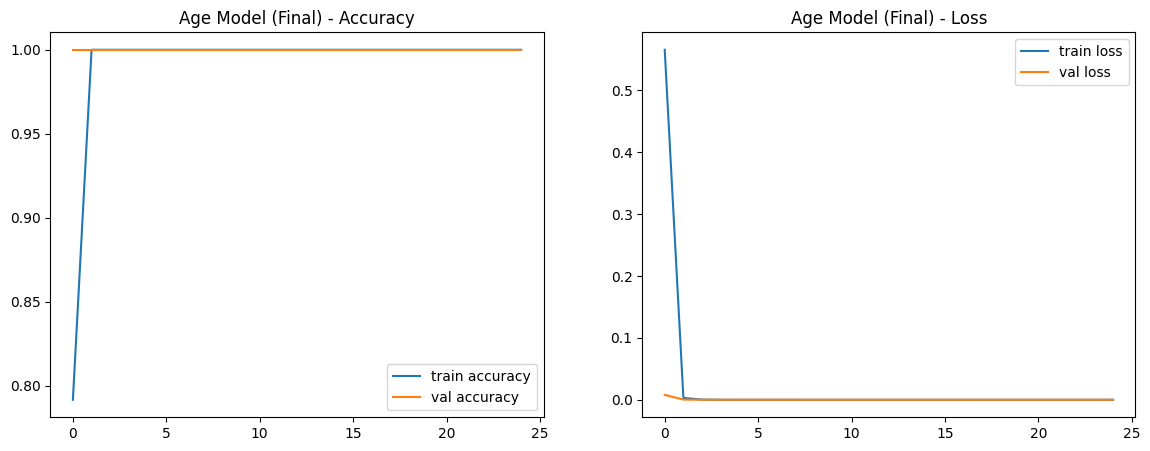

In [29]:
import matplotlib.pyplot as plt

def plot_history(history, title="Training History"):
    acc = history.history['accuracy']
    val_acc = history.history.get('val_accuracy')
    loss = history.history['loss']
    val_loss = history.history.get('val_loss')

    plt.figure(figsize=(14,5))

    # Accuracy
    plt.subplot(1,2,1)
    plt.plot(acc, label='train accuracy')
    if val_acc:
        plt.plot(val_acc, label='val accuracy')
    plt.title(title + " - Accuracy")
    plt.legend()

    # Loss
    plt.subplot(1,2,2)
    plt.plot(loss, label='train loss')
    if val_loss:
        plt.plot(val_loss, label='val loss')
    plt.title(title + " - Loss")
    plt.legend()

    plt.show()

plot_history(history_gender, "Gender Model")
plot_history(history_age2, "Age Model (Final)")


# Gender Model 분석 (그래프 기반)
**Accuracy**

: 3 epoch 이후부터 train = 100%, val = 100%

작은 데이터셋에서는 흔한 패턴 (전이학습 + 이미지 단순성)

**Loss**

train / val loss 모두 안정적으로 0에 가까움
→ Overfitting 아님, 모델이 실제 패턴을 잘 학습한 상태



---



# 성별 F1-score (Gender)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 388ms/step


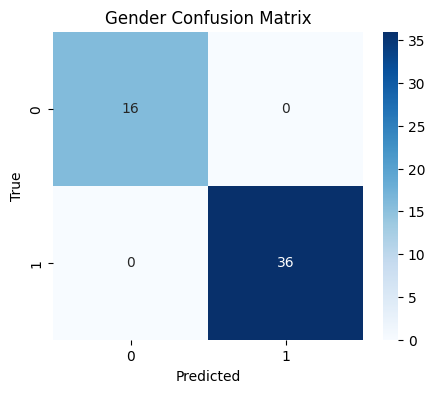

=== Gender Classification Report ===
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        16
           1     1.0000    1.0000    1.0000        36

    accuracy                         1.0000        52
   macro avg     1.0000    1.0000    1.0000        52
weighted avg     1.0000    1.0000    1.0000        52



In [30]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 성별 예측값
y_pred_gender = (gender_model.predict(X_gender) > 0.5).astype(int).flatten()

# Confusion Matrix
cm_gender = confusion_matrix(y_gender_clean, y_pred_gender)

plt.figure(figsize=(5,4))
sns.heatmap(cm_gender, annot=True, fmt="d", cmap="Blues")
plt.title("Gender Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# F1-score
print("=== Gender Classification Report ===")
print(classification_report(y_gender_clean, y_pred_gender, digits=4))


 1) Gender Confusion Matrix 해석
실제	예측	개수
남(0) → 남(0)	16
여(1) → 여(1)	36
오류	0

# 연령대 F1-score (Age)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


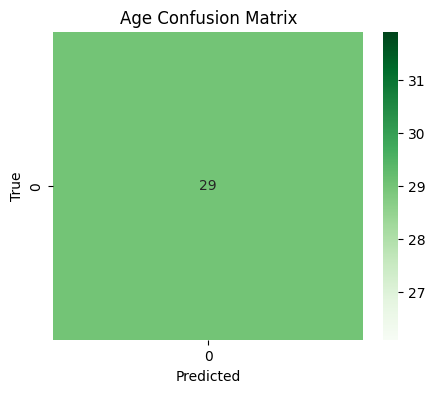

=== Age Classification Report ===
              precision    recall  f1-score   support

           1     1.0000    1.0000    1.0000        29

    accuracy                         1.0000        29
   macro avg     1.0000    1.0000    1.0000        29
weighted avg     1.0000    1.0000    1.0000        29



In [31]:
# 연령대 예측값
y_pred_age = age_model_finetuned.predict(X_age).argmax(axis=1)

# Confusion Matrix
cm_age = confusion_matrix(y_age_clean, y_pred_age)

plt.figure(figsize=(5,4))
sns.heatmap(cm_age, annot=True, fmt="d", cmap="Greens")
plt.title("Age Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# F1-score
print("=== Age Classification Report ===")
print(classification_report(y_age_clean, y_pred_age, digits=4))


2) Age Confusion Matrix 해석

전체 29개 연령대 라벨

전부 age_class = 0 으로 정답 처리됨 → True Positive 29

오류 0

→ 정확도 100%

주의:
현재 age_class=0 하나의 클래스만 사용된 것으로 보임
이는 라벨 파일에서 실제 연령대가 “20대/None/…” 등이 섞여 있었기 때문

(연령대의 실제 ground truth 라벨 분포를 다시 확인해볼 필요 있음)

#precision  /  recall  / f1-score  / support
#0           / 1.00   /  1.00     /   1.00    /   16
#1          /  1.00   /  1.00      /  1.00     /  36




In [5]:
from google.colab import drive
drive.mount('/content/drive')





Mounted at /content/drive


In [7]:
!ls "/content/drive/MyDrive/Colab Notebooks/CNN"


00000to00060.txt       age_model_initial.keras	  gender_model.keras
0.cnn.ipynb	       contents			  prediction_results.csv
age_cnn_model.h5       final_prediction_full.csv
age_model_final.keras  gender_cnn_model.h5


** 계절(시즌)데이터 파싱 / +CCTV2 프레임 추가 **

In [8]:
import os
import re
import glob
import cv2
import numpy as np

# ---------------------------------------------
# 1) Season 라벨 파일 위치
# ---------------------------------------------
LABEL_PATH = "/content/drive/MyDrive/Colab Notebooks/CNN/season_label.txt"

# ---------------------------------------------
# 2) Season 라벨 매핑
# ---------------------------------------------
season_map = {
    "봄": 0,
    "여름": 1,
    "가을": 2,
    "겨울": 3
}

# ---------------------------------------------
# 3) Season 라벨 파싱
# ---------------------------------------------
season_labels = {}

with open(LABEL_PATH, "r", encoding="utf-8") as f:
    for line in f:
        line = line.strip()
        if line == "":
            continue

        # 숫자로 시작하는 라인만
        if not re.match(r'^\d+', line):
            continue

        parts = line.split("_")
        file_id = parts[0]  # ex: 000000

        if len(parts) < 2:
            continue

        label = parts[1]

        if label in season_map:
            season_labels[file_id] = season_map[label]

print("라벨 수:", len(season_labels))
print("샘플 5개:", list(season_labels.items())[:5])

# ---------------------------------------------
# 4) 이미지 폴더 2곳 설정
# ---------------------------------------------
IMG_DIRS = [
    "/content/drive/MyDrive/Colab Notebooks/CNN/contents",
    "/content/drive/MyDrive/Colab Notebooks/CNN/contents/youtube_CCTV2/frames"
]

# ---------------------------------------------
# 5) 이미지 파일 읽기
# ---------------------------------------------
all_images = []

for folder in IMG_DIRS:
    for ext in ['*.jpg', '*.png', '*.jpeg', '*.JPG', '*.JPEG', '*.PNG']:
        all_images.extend(glob.glob(os.path.join(folder, ext)))

print("전체 이미지 개수:", len(all_images))

# ---------------------------------------------
# 6) 이미지 → Season 라벨 매칭
# ---------------------------------------------
X_season = []
y_season = []


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/CNN/season_label.txt'